In [9]:
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from ch07.simple_convnet import SimpleConvNet
from common.optimizer import *
import numpy as np

In [10]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
test_size = x_test.shape[0]
batch_size = 128
max_iterations = 1000
mi = np.arange(max_iterations)
optimizer = AdaGrad()
markers = {'sigmoid':"x", 'relu':"s", 'nSigmoid':"D"}

In [11]:
def test(test_list):
    networks = {}
    train_acc = {}
    train_loss = {}
    test_acc = {}
    test_loss = {}
    optimizer = {}


    for key in test_list.keys():
        # 기록 리스트 생성
        train_acc[key] = []
        train_loss[key] = []
        test_acc[key] = []
        test_loss[key] = []

        # nSigmoid 경우 파라미터
        # key == 'nSigmoid_8' -> act = nSigmoid, threshold = 8
        model = test_list[key]['model']
        act = test_list[key]['act']
        std = test_list[key]['std']
        threshold = test_list[key]['threshold']
        lr = test_list[key]['lr']


        # 네트워크와 optimizer 생성
        if model == 'ANN':
            networks[key] = MultiLayerNet(
                input_size=784, hidden_size_list=[100, 100, 100, 100],
                output_size=10, activation=act, weight_init_std=std, threshold=threshold)
        else:
            networks[key] = SimpleConvNet()
        optimizer[key] = AdaGrad(lr)

    # 학습
    for i in range(max_iterations):

        # mini-batch train
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]

        # mini-batch test
        batch_mask_t = np.random.choice(test_size, batch_size)
        x_batch_t = x_test[batch_mask_t]
        t_batch_t = t_test[batch_mask_t]

        if i % 100 == 0:
            print( "===========" + "iteration:" + str(i) + "===========")

        # 학습
        for key in test_list.keys():
            if test_list[key]['model'] == 'CNN':
                x_batch = x_batch.reshape(-1, 1, 28, 28)
                x_batch_t = x_batch_t.reshape(-1, 1, 28, 28)
            # 학습
            grads = networks[key].gradient(x_batch, t_batch)
            optimizer[key].update(networks[key].params, grads)

            # 기록
            train_acc[key].append(networks[key].accuracy(x_batch, t_batch))
            train_loss[key].append(networks[key].loss(x_batch, t_batch))
            test_acc[key].append(networks[key].accuracy(x_batch_t, t_batch_t))
            test_loss[key].append(networks[key].loss(x_batch_t, t_batch_t))

            # 100회마다 경과 출력
            if i % 100 == 0:
                print(key + ":\n",  np.sum(np.abs(grads['W1'])))
                # print(key + " loss:" + str(acc))
                t_loss = networks[key].loss(x_batch_t, t_batch_t)
                # print(key + " loss:" + str(t_loss))

    return train_acc, train_loss, test_acc, test_loss


def plot(label, datas, t_list, *y_lim):
    for key in t_list:
        plt.plot(mi, smooth_curve(datas[key]), markevery=50, label=key)
    plt.xlabel("iterations")
    plt.ylabel(label)
    if y_lim:
        plt.ylim(y_lim)
    plt.legend()
    plt.show()

In [12]:
test_list = {
    'relu':
        {'model': 'ANN', 'act': 'relu', 'std': 'he','threshold': 5, 'lr': 0.01},
    'nSigmoid_':
        {'model': 'ANN', 'act': 'tSigmoid', 'std': 'xavier', 'threshold': 5, 'lr': 0.01},
    'nSigmoid':
        {'model': 'ANN', 'act': 'nSigmoid', 'std': 'xavier', 'threshold': 5, 'lr': 0.01},
}


sd = 1
train_acc, train_loss, test_acc, test_loss = test(test_list)

===========iteration:0===========
relu:
 153.05583711670332
nSigmoid_:
 0.6896457110101891
nSigmoid:
 76.19771877383373
===========iteration:100===========
relu:
 85.44350134643912
nSigmoid_:
 2.61595728408543
nSigmoid:
 66.6781915414472
===========iteration:200===========
relu:
 102.68996585752814
nSigmoid_:
 4.735471777864707
nSigmoid:
 90.07445607058592
===========iteration:300===========
relu:
 51.46093030163553
nSigmoid_:
 2.144269489315684
nSigmoid:
 46.92330939541398
===========iteration:400===========
relu:
 98.95098275712493
nSigmoid_:
 5.396094649998497
nSigmoid:
 106.01165001082676
===========iteration:500===========
relu:
 124.63531324537438
nSigmoid_:
 4.235644001785354
nSigmoid:
 95.8459409639927
===========iteration:600===========
relu:
 47.06270550193526
nSigmoid_:
 3.40935612843251
nSigmoid:
 59.60142447996641
===========iteration:700===========
relu:
 112.35254189901138
nSigmoid_:
 3.21366275530977
nSigmoid:
 100.04931032762597
===========iteration:800===========
relu

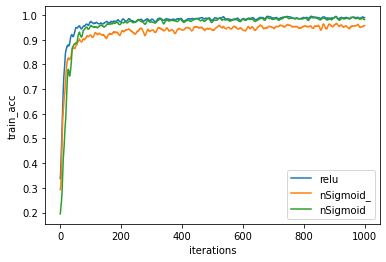

In [13]:
plot('train_acc', train_acc, test_list)

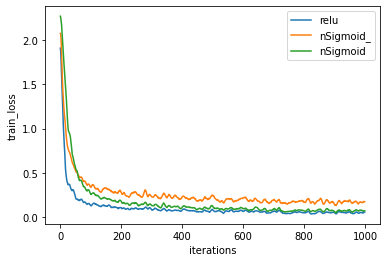

In [14]:
plot('train_loss', train_loss, test_list)

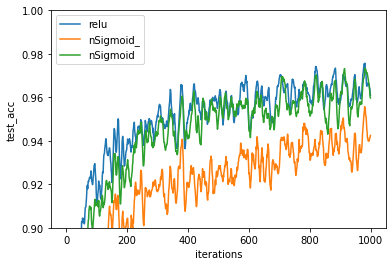

In [15]:
plot('test_acc', test_acc, test_list, *(0.9, 1))

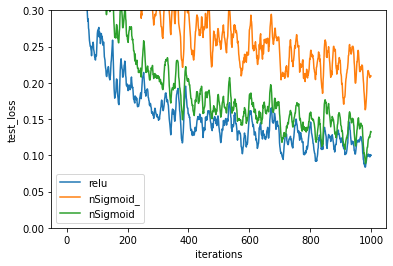

In [16]:
plot('test_loss', test_loss, test_list, *(0,0.3))

In [17]:
for key in test_list:
    print(key + " best train_acc:" + str(max(train_acc[key])))
    print(key + " best train_loss:" + str(min(train_loss[key])))
    print(key + " best test_acc:" + str(max(test_acc[key])))
    print(key + " best test_loss:" + str(min(test_loss[key])) + "\n")

relu best train_acc:1.0
relu best train_loss:0.0145481699295101
relu best test_acc:1.0
relu best test_loss:0.030519852735369626

nSigmoid_ best train_acc:1.0
nSigmoid_ best train_loss:0.05053430825817026
nSigmoid_ best test_acc:0.9921875
nSigmoid_ best test_loss:0.05205780235031486

nSigmoid best train_acc:1.0
nSigmoid best train_loss:0.022933403089490424
nSigmoid best test_acc:1.0
nSigmoid best test_loss:0.045110305943375256



In [18]:
# act = ['nSigmoid']
# for i in range(1):
#     print(i)
#     t_a, t_l = test(0.5, act)
#
#     with open('./result/128_10/test/3.txt', 'a') as f:
#         for key in act:
#             f.write(str(i) + " best acc: " + str(max(t_a[key])) + '\n')
#             f.write(str(i) + " best loss: " + str(min(t_l[key])) + '\n')
